### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 27th at 11.59pm CST
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

/var/folders/41/bw8lksgn1qnf46x_jj7ryc4r0000gn/T/ipykernel_51801/3377241335.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [144]:
fills = [(24/256,239/256,256/256,0.18), (256/256,74/256,173/256,0.19),(256/256,245/256,13/256,0.19)]

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

$$ \sqrt{\frac{1}{2 \sigma^{2}}*\pi} \int_{- \infty}^{\infty}e^{-\frac{x^{2}}{2 \sigma^{2}}}dx = 1$$

<span style="color:red">SRT: The factor of $pi$ should be in the denominator. -1 point.</span>

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

In [93]:
# 3
N = 10**5
sigma = 3

dist_norm = scipy.stats.norm(scale=sigma)
norm_rvs = dist_norm.rvs(size=N)
mask = norm_rvs>0


(array([2.15299183e-04, 3.21603155e-03, 2.21533889e-02, 7.51080172e-02,
        1.25972449e-01, 1.05254388e-01, 4.46431828e-02, 8.76447093e-03,
        1.02267112e-03, 6.27955952e-05]),
 array([-12.2899375 ,  -9.70203081,  -7.11412411,  -4.52621742,
         -1.93831072,   0.64959597,   3.23750267,   5.82540936,
          8.41331606,  11.00122275,  13.58912945]),
 <BarContainer object of 10 artists>)

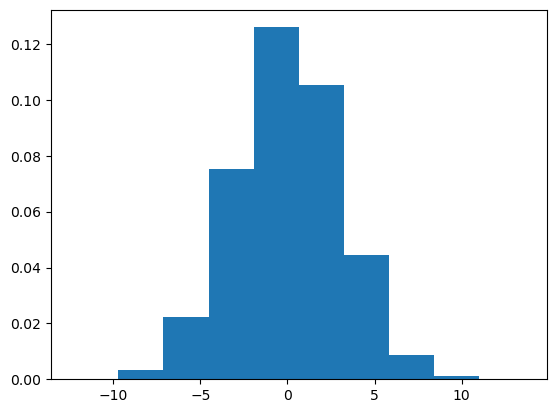

<span style="color:red">Try the following code:</span>

In [ ]:
def monte_carlo_integral(sigma):
    x = np.random.normal(0.0,sigma,100000)
    mask = x >= 0.
    x = x[mask]
    return np.mean(x**3) * 0.5 * np.sqrt(2.0*np.pi*sigma**2)

<span style="color:red">SRT: Let's talk about this one, Sofi. The idea is to write down the integral such that it involves a function from which you can easily draw samples. Since we know how to make samples from a half-Gaussian (i.e., draw from a Gaussian, then mask), one can use Monte Carlo integration. -9 points.</span>

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

In [106]:
mu = 100
sig = 15

10 Random Draws:  [101.54651978  58.32133316  77.65053515 104.67982944 119.83996925
  85.39098117 101.49940142 104.59434174  82.97172987  94.24136933]

P(x=145) =  0.0002954565607958672


Text(0, 0.5, 'p(x | $\\mu, \\sigma$)')

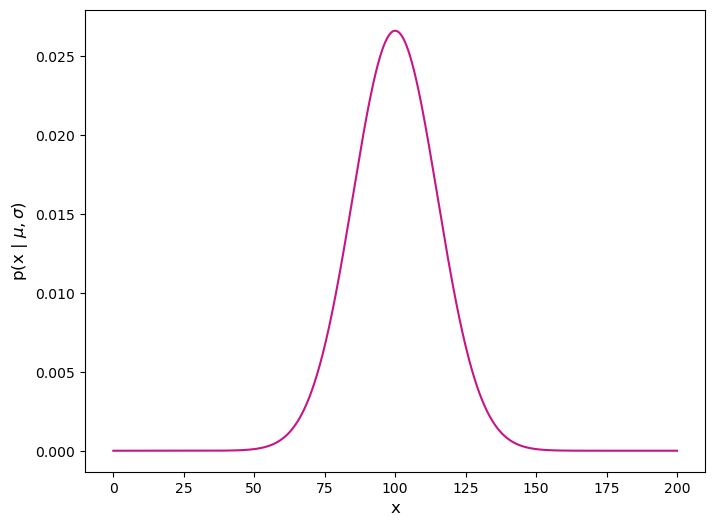

In [107]:
# 1
N = 10
x_ = 145

distG = scipy.stats.norm(loc=mu, scale=sig) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(size=N) # 10 random draws
p = distG.pdf(x=x_)

print('10 Random Draws: ', draws)
print('')
print('P(x=145) = ', p)

x_lims = np.linspace(0, 200, 10000)
plt.figure(figsize=(8,6))
plt.plot(x_lims, distG.pdf(x=x_lims), color='mediumvioletred')
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x | $\mu, \sigma$)', fontsize=12)

Text(0, 0.5, 'CDF(x | $\\mu, \\sigma$)')

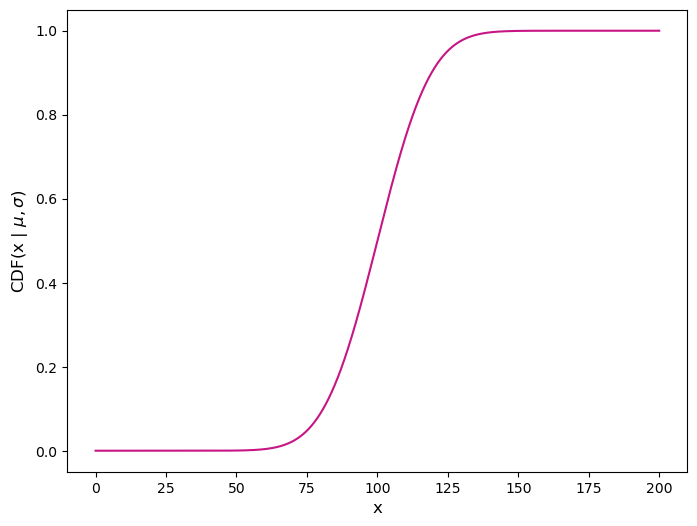

In [108]:
# 2
Gcdf = distG.cdf(x_lims)
# Gppf = distG.ppf()

plt.figure(figsize=(8,6))
plt.plot(x_lims, Gcdf, color='mediumvioletred')
plt.xlabel('x', fontsize=12)
plt.ylabel('CDF(x | $\mu, \sigma$)', fontsize=12)

Text(0, 0.5, 'p(x | $\\mu, \\sigma$)')

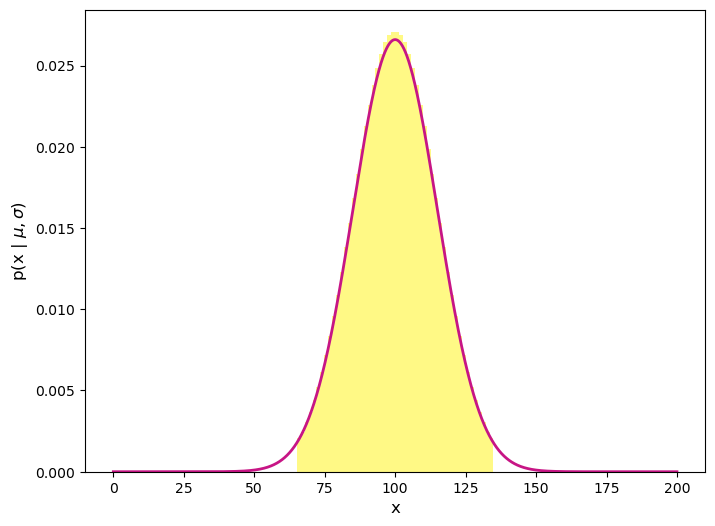

In [109]:
x_ppf = np.linspace(0.01,0.99,10000) 
results = distG.ppf(x_ppf) #Value of the normal distribution at those probabilities

plt.figure(figsize=(8,6))
plt.hist(results,bins=50,histtype='stepfilled', alpha=0.5, density=True, color=fills[2])
plt.plot(x_lims, distG.pdf(x=x_lims), color='mediumvioletred', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x | $\mu, \sigma$)', fontsize=12)

In [111]:
distG.sf(145) # Survival Function = 1 - cdf

0.0013498980316300933

**Only 0.13% of people have an IQ > 145**

In [127]:
# 4
np.where((distG.sf(x_lims)<1.01E-6) & (distG.sf(x_lims)>9.9E-7)) # Indices where sf is about one millionth

(array([8563, 8564, 8565]),)

In [128]:
print('IQ: ',x_lims[8563:8566])
print('Percent: ', distG.sf(x_lims[8563:8566]))

IQ:  [171.27712771 171.29712971 171.31713171]
Percent:  [1.00802627e-06 1.00139799e-06 9.94811590e-07]


**An IQ of 171 is one in a million!**

<span style="color:red">SRT: All good for this question!</span>

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

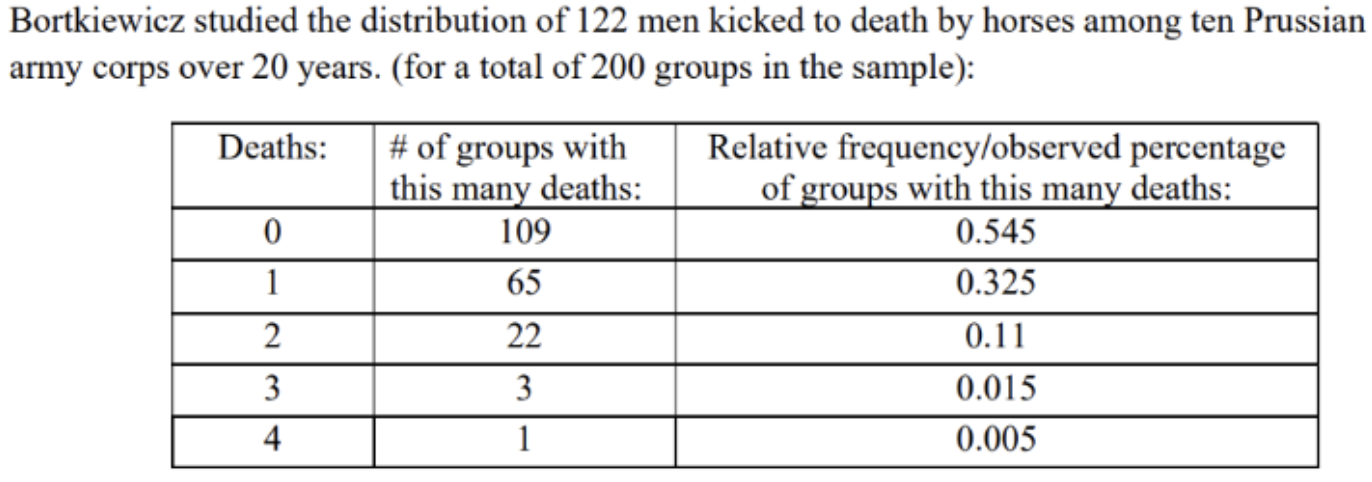

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

Text(0, 0.5, 'Relative Frequency')

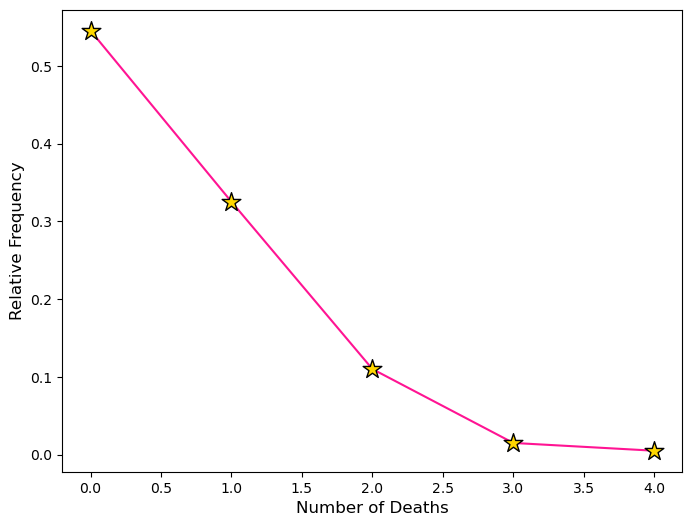

In [129]:
# 1
deaths = np.array([0,1,2,3,4])
percentage = np.array([0.545, 0.325, 0.11, 0.015, 0.005])

plt.figure(figsize=(8,6))
plt.plot(deaths, percentage, color='deeppink', zorder=1)
plt.scatter(deaths, percentage, marker='*', color='gold', ec='black', s=200, zorder=2)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)

Text(0, 0.5, 'p(x | $\\mu$)')

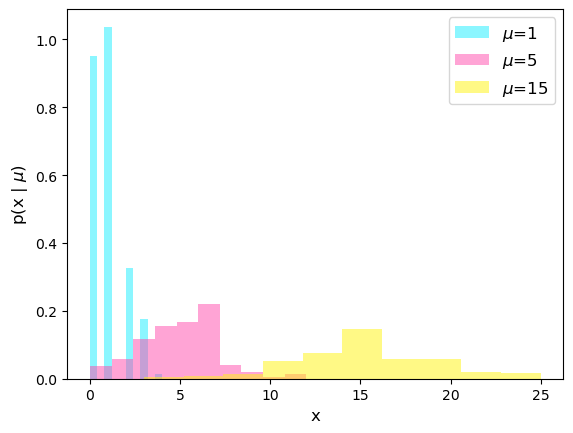

In [155]:
# 2
P1 = scipy.stats.poisson.rvs(mu=1, size=200)
P5 = scipy.stats.poisson.rvs(mu=5, size=200)
P15 = scipy.stats.poisson.rvs(mu=15, size=200)

plt.hist(P1, density=True, histtype='stepfilled', color=fills[0], alpha=0.5, label='$\mu$=1')
plt.hist(P5, density=True, histtype='stepfilled', color=fills[1], alpha=0.5, label='$\mu$=5')
plt.hist(P15, density=True, histtype='stepfilled', color=fills[2], alpha=0.5, label='$\mu$=15')
plt.legend(fontsize=12)
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x | $\mu$)', fontsize=12)

In [131]:
# 3
d0 = np.zeros(109)
d1 = np.ones(65)
d2 = np.ones(22)*2
d3 = np.ones(3)*3
d4 = np.ones(1)*4

d = np.concatenate((d0,d1,d2,d3,d4))

print('Mean Number of Deaths: ', d.mean())
print('Standard Deviation: ', d.std())

Mean Number of Deaths:  0.61
Standard Deviation:  0.7796794213008319


<span style="color:red">SRT: Good!</span>

Text(0.5, 0, 'Number of Deaths')

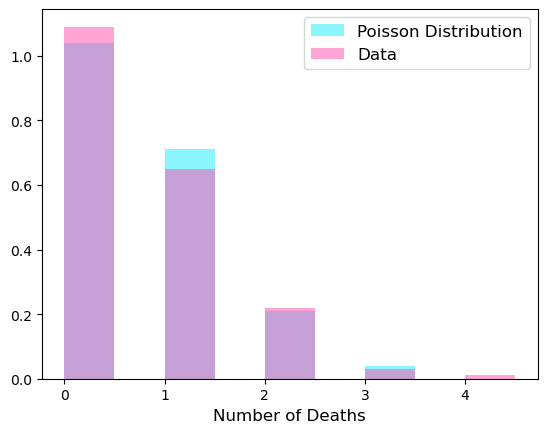

In [147]:
P = scipy.stats.poisson.rvs(mu=0.61,  size=200)
bins_ = np.arange(0,5,0.5)
plt.hist(P, density=True, color=fills[0], alpha=0.5, histtype='stepfilled', label='Poisson Distribution', 
         align='mid', bins=bins_)
plt.hist(d, density=True, color=fills[1], alpha=0.5, histtype='stepfilled', label='Data', align='mid',
         bins=bins_)
plt.legend(fontsize=12)
plt.xlabel('Number of Deaths', fontsize=12)

<span style="color:red">SRT: Good, but instead of drawing samples from the Poisson with your deduced mean value of 0.61, you can just plot the pmf for that Poisson distribution at the different x values.</span>